# Importing dataset and libraries

In [10]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('./forecasting_dataset/crime1.csv',encoding='latin-1')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

Initial dataset shape.

In [11]:
print('Dataset shape ->', dataset.shape)
dataset.head()

Dataset shape -> (319073, 17)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


How many missing values we have per columns.

In [12]:
dataset.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

Selecting a few columsn do be used during the exploratory data analysis.

Removing the year 2017 due be is not full.

#data_ead = dataset[dataset.Year != 2017].drop(
    [
        "Unnamed: 0",
        "ID",
        "IUCR",
        "Beat",
        "Case Number",
        "District",
        "Ward",
        "Updated On",
        "Year",
        "Community Area",
        "X Coordinate",
        "Y Coordinate",
        "Latitude",
        "Longitude",
        "Location",
        "FBI Code",
    ],
    axis=1,
)

Transforming the Date in Datetime...

In [26]:
dataset.Date = pd.to_datetime(dataset.OCCURRED_ON_DATE, format="%Y-%m-%d %I:%M:%S")
dataset.set_index("OCCURRED_ON_DATE", inplace=True)

ValueError: time data '2018-09-02 13:00:00' does not match format '%Y-%m-%d %I:%M:%S' (match)

## Number of cases by type

In this part, let's try to indentify the tend and highpoints or lowpoints.

### Primary Type

In [6]:
# Function to plot the serie value_counts
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.Blugrn)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


plot_counts(data_ead["Primary Type"], "Kind of Crimes")

THEFT, BATTERY, CRIMINAL DAMAGE and NARCOTICS represents more the 65% of the crimes. 

### Location Description
Where those crimes happens? 

In [7]:
plot_counts(data_ead["Location Description"], "Location of Crimes")

STREET and SIDEWALK represents more the 1/3 of the crimes. 

## Number of cases per Year x Months
Let's see the number of crimes per Year and Months...

In [8]:
aux = pd.DataFrame(data_ead.resample("M").size(), columns=["Number of cases"])
aux["Month"] = aux.index.month.astype(str)
aux["Year"] = aux.index.year.astype(str)
aux["Year-Month"] = aux["Year"].str.cat(aux["Month"].str.zfill(2), sep="-")
aux.head()

,Number of cases,Month,Year,Year-Month
Date,,,,
2005-01-31,33983,1,2005,2005-01
2005-02-28,32042,2,2005,2005-02
2005-03-31,36970,3,2005,2005-03
2005-04-30,38963,4,2005,2005-04
2005-05-31,40572,5,2005,2005-05


### by Heatmap

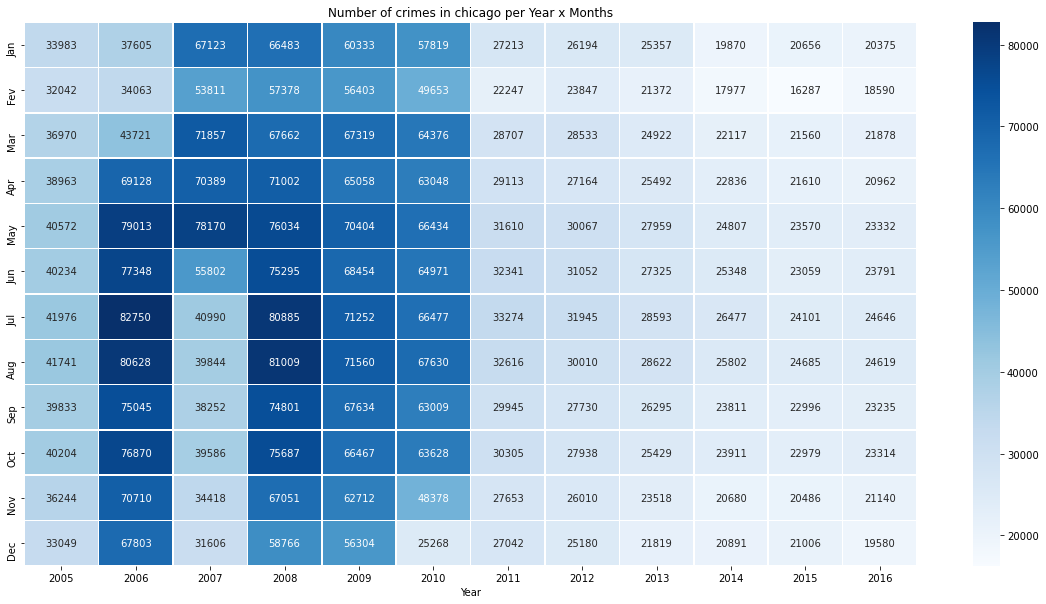

In [9]:
aux_csm = aux[["Month", "Year", "Number of cases"]]
aux_csm = aux_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int)
aux_csm.index = aux_csm.index.astype(int)
aux_csm = aux_csm.sort_index()
aux_csm.index = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    aux_csm,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
).set_title('Number of crimes in chicago per Year x Months')

The years between 2006 and 2010 were a tough time, the year 2008 was the worst with a mean of 71004 crimes per month, and the best year was the 2015 with a mean of 21916 crimes per month.

### by Bars 

In [10]:
fig = px.bar(
    aux,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

Similar graph but using bars to visualize. Again the 'tough time' during 2006 until 2010. 



### Agregate by Months


In [11]:
agg_months = aux.groupby(['Month'])['Number of cases'].sum().reset_index()
agg_months.Month = agg_months.Month.astype(int)
agg_months.sort_values('Month',inplace=True)
agg_months.Month = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = px.bar(
    agg_months,
    x="Month",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Month)")
fig.show()

Looks like in the summer have a tend for more crimes in chicago.

### Agregate by Year

In [12]:
fig = px.bar(
    aux.groupby(['Year'])['Number of cases'].sum().reset_index(),
    x="Year",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Years)")

fig.show()

Similar graph but using bars to visualize. Again the 'tough time' during 2006 until 2010. 


## Map plot

There is some area or specific location that used to happen crimes? 

In [13]:
map_marks = dataset[['Latitude', 'Longitude']]
map_marks['Year'] =  pd.to_datetime(dataset.Date, format="%m/%d/%Y %I:%M:%S %p").dt.year
map_marks = map_marks.dropna()
map_marks.head()

,Latitude,Longitude,Year
0,41.981913,-87.771996,2006
1,41.775733,-87.611920,2006
2,41.769897,-87.593671,2006
3,41.942984,-87.780057,2006
4,41.784211,-87.716745,2006


In [14]:
fig = px.scatter_mapbox(map_marks[map_marks.Year == 2016].sample(5000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=9, height=650)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Look like there is crime everywhere in Chicago, in the centre, you can see more points but also is a crowded place.

## Arrested?
What is the arrested rate per crime?

In [15]:
aux = data_ead.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4)*100
aux.sort_values('Arrest', inplace=True)
fig = px.bar(
    aux,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    #width=800,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()

The “VIOLATION” crimes look strongly correlated to the arrested rate once the 'cop' must be present in the location to declare the violation. 

# Model - Forecast

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [16]:
data_time = dataset.drop(
    [
        "Unnamed: 0",
        "ID",
        "IUCR",
        "Beat",
        "Case Number",
        "District",
        "Ward",
        "Updated On",
        "Year",
        "Community Area",
        "X Coordinate",
        "Y Coordinate",
        "Latitude",
        "Longitude",
        "Location",
        "FBI Code",
    ],
    axis=1,
)
data_time.Date = pd.to_datetime(data_time.Date, format="%m/%d/%Y %I:%M:%S %p")
data_time.set_index('Date', inplace=True)
data_time.sample(3)

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2011-05-05 11:10:00,031XX S HALSTED ST,ASSAULT,SIMPLE,OTHER,True,False
2007-02-10 12:40:36,016XX W JONQUIL TER,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False
2014-10-24 18:20:00,021XX W ADAMS ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True


In [17]:
data_model = pd.DataFrame(data_time.resample("M").size().reset_index())
data_model.columns = ["ds", "y"]
print(data_model.shape)
data_model.head()

(145, 2)


,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572


### What is the period?

First of all, let's plot the whole series to see the data behaviour.

In [18]:
fig = px.line(data_model, x="ds", y="y")
fig.update_layout(
    title="Chicago crimes from 2005 to 2016 (counted per Month).",
    xaxis_title="Date",
    yaxis_title="Crimes",
    font=dict(
        size=14,
    )
)

In this time series we have the crimes per month, a total per month.

### Modeling

In [19]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
import itertools


def create_param_combinations(**param_dict):
    param_iter = itertools.product(*param_dict.values())
    params = []
    for param in param_iter:
        params.append(param)
    params_df = pd.DataFrame(params, columns=list(param_dict.keys()))
    return params_df


def train_return_results(params):
    model = Prophet(**params)
    model.fit(data_model[75:-6])

    future = model.make_future_dataframe(periods=6, freq="M")
    forecast = model.predict(future)

    return mean_squared_error(data_model["y"][-6:], forecast["yhat"][-6:])


param_grid = {
    "changepoint_prior_scale": [0.005, 0.05, 0.5, 5],
    "changepoint_range": [0.8, 0.9],
    "seasonality_prior_scale": [0.1, 1, 10.0],
    "holidays_prior_scale": [0.1, 1, 10.0],
    "seasonality_mode": ["multiplicative", "additive"],
    # "growth": ["linear", "logistic"],
    "yearly_seasonality": [5, 10, 20],
}

# Generate all combinations of parameters
all_params = create_param_combinations(**param_grid)

# Use cross validation to evaluate all parameters
rmses = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_return_results)(dict(zip(all_params.keys(), param)))
    for param in all_params.values
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

In [20]:
all_params["rsme"] = rmses
best_paramers = dict(all_params.sort_values("rsme").drop("rsme", axis=1).iloc[0])
print(best_paramers)

{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive', 'yearly_seasonality': 5}


In [21]:
model = Prophet(**best_paramers)
model.fit(data_model[75:])

future = model.make_future_dataframe(periods=5, freq="M")
forecast = model.predict(future)

## Result plot

In [22]:
plot_plotly(model, forecast)

The model adapted well to this part of it, the sasionality is clear in the graph and also we can see a decrease trend.

In [23]:
plot_components_plotly(model, forecast)

There is a reduction trend and the sasionality is strong in the first part of the year.

In [24]:
forecast.tail(6)[['ds','yhat','yhat_lower','yhat_upper']].round()

,ds,yhat,yhat_lower,yhat_upper
69,2017-01-31,15705.0,14559.0,16887.0
70,2017-02-28,13942.0,12801.0,15110.0
71,2017-03-31,17383.0,16261.0,18474.0
72,2017-04-30,17225.0,16089.0,18360.0
73,2017-05-31,18908.0,17728.0,20051.0
74,2017-06-30,19197.0,18033.0,20396.0


In [25]:
yhat = str(int(forecast.iloc[-1]['yhat']))
yhat_lower = str(int(forecast.iloc[-1]['yhat_lower']))
yhat_upper = str(int(forecast.iloc[-1]['yhat_upper']))
print('Following the model, for July we have', yhat ,"crimes and considering the error margin it's possible to have a value between",yhat_lower, '~', yhat_upper,'.')

Following the model, for July we have 19197 crimes and considering the error margin it's possible to have a value between 18033 ~ 20396 .
